In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from pycaret.classification import *

c:\Users\Aurav\miniconda3\envs\tf\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
accuracy_df = pd.DataFrame(columns=['Sheet Name', 'Accuracy'])

In [3]:
# Read the Excel file
df = pd.read_excel('./super_merged.xlsx')
import re
df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [4]:
df.head()

,FP1_a5_wavelet_energy,FP1_d5_wavelet_energy,FP1_d4_wavelet_energy,FP1_d3_wavelet_energy,FP1_d2_wavelet_energy,FP1_d1_wavelet_energy,FP1_a5_shannon_entropy,FP1_d5_shannon_entropy,FP1_d4_shannon_entropy,FP1_d3_shannon_entropy,...,Y_d3_variance,Y_d2_variance,Y_d1_variance,Y_a5_median,Y_d5_median,Y_d4_median,Y_d3_median,Y_d2_median,Y_d1_median,value
0,113.912200,92.010733,101.119200,-55.266267,-686.408067,-2886.351267,-201295.934800,-112642.799867,-68350.230800,-24196.096400,...,32.352735,7.058233,0.974340,-0.591840,0.002156,-0.060497,-0.051992,0.027428,0.008167,1
1,225.743533,215.030800,367.861533,641.237333,812.579467,102.199200,-176535.471333,-125664.169467,-114388.147867,-118121.468667,...,83.541897,20.304280,2.882972,-0.297936,-0.523420,-0.239968,0.224161,-0.085259,0.007956,0
2,212.888000,177.275000,250.288200,312.610933,109.715133,-1322.047733,-142142.044667,-50901.135733,-25619.038533,-15635.169667,...,22.203586,5.430867,0.776517,-1.293857,-0.572255,-0.082069,-0.019163,-0.010274,0.012778,1
3,161.754400,128.930533,171.509800,125.740267,-253.807400,-2044.372600,-47034.249933,-16714.406267,-9535.261333,-3930.634400,...,13.478167,3.222266,0.466394,-0.754545,-0.157818,-0.374955,-0.021290,0.004537,0.006805,1
4,105.401133,65.764267,74.646867,-17.952133,-577.473400,-2695.381000,-99705.802733,-37552.277467,-39563.840733,-23168.109800,...,48.363836,11.237215,1.590343,0.701544,-1.094063,-0.258746,0.323597,-0.007740,-0.000955,1


In [5]:
clf = setup(use_gpu = True, 
            data = df, 
            target='value', 
            normalize = True, 
            normalize_method = 'robust', 
            fold_strategy = 'stratifiedkfold',
            verbose= True,
            feature_selection = True,
            feature_selection_method= 'univariate',
            )
#top_3_models = compare_models(n_select = 3)

,Description,Value
0,Session id,7363
1,Target,value
2,Target type,Binary
3,Original data shape,"(121, 1921)"
4,Transformed data shape,"(121, 385)"
5,Transformed train set shape,"(84, 385)"
6,Transformed test set shape,"(37, 385)"
7,Numeric features,1920
8,Preprocess,True
9,Imputation type,simple


In [6]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7222,0.7317,0.7800,0.7814,0.7716,0.4134,0.4239,1.1540
lightgbm,Light Gradient Boosting Machine,0.7194,0.7300,0.8533,0.7562,0.7933,0.3661,0.3982,1.1390
nb,Naive Bayes,0.6972,0.6678,0.7567,0.7631,0.7538,0.3499,0.3628,0.4380
lda,Linear Discriminant Analysis,0.6917,0.6839,0.7133,0.8217,0.7456,0.3445,0.3672,0.5430
et,Extra Trees Classifier,0.6847,0.7167,0.7767,0.7429,0.7495,0.3092,0.3312,1.0200
lr,Logistic Regression,0.6806,0.6933,0.7533,0.7479,0.7439,0.3082,0.3095,1.0470
svm,SVM - Linear Kernel,0.6694,0.0000,0.6933,0.7693,0.7123,0.2962,0.3184,0.3020
gbc,Gradient Boosting Classifier,0.6611,0.7628,0.7333,0.7183,0.7205,0.2654,0.2811,1.4510
dummy,Dummy Classifier,0.6306,0.5000,1.0000,0.6306,0.7730,0.0000,0.0000,0.4850
knn,K Neighbors Classifier,0.6111,0.6503,0.6800,0.7086,0.6835,0.1638,0.1654,0.4620


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [7]:
print(best)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=7363, verbose=0, warm_start=False)


In [8]:
plot_model(best, plot='parameter')

,Parameters
bootstrap,True
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,sqrt
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_samples_leaf,1


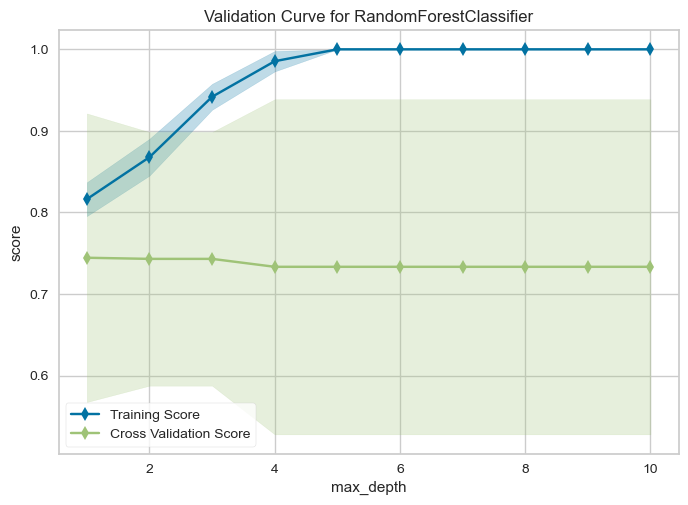

In [9]:
plot_model(best, plot = 'vc')

In [ ]:
best_model_tuned = tune_model(best, n_iter = 30)

In [ ]:
best_model_tuned = tune_model(best, search_library = 'tune-sklearn', search_algorithm = 'hyperopt')

In [11]:
best_model_tuned = tune_model(best, search_library = 'optuna')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7778,0.7778,1.0000,0.7500,0.8571,0.4000,0.5000
1,0.8889,0.9444,1.0000,0.8571,0.9231,0.7273,0.7559
2,0.5556,0.5000,0.6667,0.6667,0.6667,0.0000,0.0000
3,0.8889,0.9500,0.8000,1.0000,0.8889,0.7805,0.8000
4,0.8750,0.6667,1.0000,0.8333,0.9091,0.7143,0.7454
5,0.6250,0.6000,0.8000,0.6667,0.7273,0.1429,0.1491
6,0.7500,0.8000,0.8000,0.8000,0.8000,0.4667,0.4667
7,0.7500,0.8667,0.8000,0.8000,0.8000,0.4667,0.4667
8,0.8750,1.0000,0.8000,1.0000,0.8889,0.7500,0.7746


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

[I 2023-04-07 23:35:20,034] Searching the best hyperparameters using 84 samples...
[I 2023-04-07 23:36:48,731] Finished hyperparemeter search!


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [12]:
bag_best = ensemble_model(best)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6667,1.0000,1.0000,0.6667,0.8000,0.0000,0.0000
1,0.8889,0.8889,1.0000,0.8571,0.9231,0.7273,0.7559
2,0.5556,0.3333,0.6667,0.6667,0.6667,0.0000,0.0000
3,0.8889,0.9500,0.8000,1.0000,0.8889,0.7805,0.8000
4,0.8750,1.0000,1.0000,0.8333,0.9091,0.7143,0.7454
5,0.6250,0.6000,0.8000,0.6667,0.7273,0.1429,0.1491
6,0.6250,0.8000,0.8000,0.6667,0.7273,0.1429,0.1491
7,0.7500,0.8000,0.8000,0.8000,0.8000,0.4667,0.4667
8,0.8750,1.0000,0.8000,1.0000,0.8889,0.7500,0.7746


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [13]:
boost_best = ensemble_model(best, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6667,0.7222,1.0000,0.6667,0.8000,0.0000,0.0000
1,0.8889,0.9444,1.0000,0.8571,0.9231,0.7273,0.7559
2,0.5556,0.3889,0.6667,0.6667,0.6667,0.0000,0.0000
3,0.7778,0.9500,0.8000,0.8000,0.8000,0.5500,0.5500
4,0.8750,0.9333,1.0000,0.8333,0.9091,0.7143,0.7454
5,0.6250,0.5333,0.8000,0.6667,0.7273,0.1429,0.1491
6,0.6250,0.8000,0.8000,0.6667,0.7273,0.1429,0.1491
7,0.7500,0.9333,0.8000,0.8000,0.8000,0.4667,0.4667
8,0.8750,1.0000,0.8000,1.0000,0.8889,0.7500,0.7746


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
blend_3 = blend_models(compare_models(n_select = 3))

In [ ]:
stack_3 = stack_models(compare_models(n_select = 3))

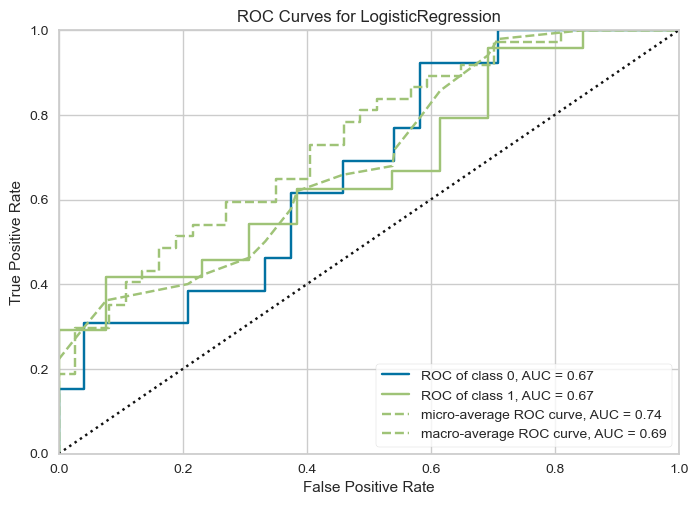

In [16]:
plot_model(best, plot = 'auc')